In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import sys
import os
from scipy import stats
import math
from scipy.optimize import curve_fit
from scipy.stats import norm
import seaborn as sns
import pandas as pd

In [6]:
folder = "/home/luigi/Documents/scripts/test_scripts/results_2020-01-17"
#folder = "/home/luigi/Documents/scripts/comparable_data/real_experiments"
sim_or_real = "sim"
window_size = 1
count=1
total_dict=dict()
number_dict=dict()

In [7]:
def window_displacement(position_filename, mean_wmsd, number_of_experiments, window_size, n_robots):
    #print("mean_wmsd", mean_wmsd)
    displacement_file=open(position_filename, mode = 'r')
    tsvin=csv.reader(displacement_file, delimiter = '\t')
    
    average_w_displacement=[]
    expe_length=0
    for row in tsvin:
        if(row[0] == "Robot id"):
            expe_length=len(row) - 1 - window_size
            print("len(row)", len(row))
            print("len(row)-window_size", len(row)-window_size)
            print("expe_length", expe_length)
            average_w_displacement=np.zeros(expe_length)
        else:
            for i in range(1 + window_size, len(row)):
                [xi, yi]=row[i-window_size].split(",")
                [xi, yi]=[float(xi), float(yi)]

                [xf, yf]=row[i].split(",")
                [xf, yf]=[float(xf), float(yf)]

                w_displacement=((xf - xi)/window_size)**2 + \
                    ((yf - yi)/window_size)**2

                average_w_displacement[i-1 - window_size] += w_displacement
    mean=0.0
    average_w_displacement = np.true_divide(average_w_displacement,n_robots)
    print("average_w_displacement", average_w_displacement)
    mean =average_w_displacement.mean()

    if(number_of_experiments == 0):
        mean_wmsd=mean
        number_of_experiments += 1
    else:
        mean_wmsd *= number_of_experiments
        mean_wmsd += mean
        number_of_experiments += 1
        mean_wmsd /= float(number_of_experiments)
    #print("mean_wmsd", mean_wmsd)
    return (mean_wmsd, number_of_experiments)

In [8]:

# Import the os module, for the os.walk function
import os
 
# Set the directory you want to start from
for dirName, subdirList, fileList in os.walk(folder):
    num_robots = "0"
    rho = -1.0
    alpha = -1.0
    elements=dirName.split("_")
    for e in elements:
        if e.startswith("robots"):
            num_robots=e.split("#")[-1]
            if(num_robots not in total_dict):
                total_dict[num_robots]=dict()
                number_dict[num_robots]=dict()

        if(e.startswith("rho")):
            rho=float(e.split("#")[-1])
        if(e.startswith("alpha")):
            alpha=float(e.split("#")[-1])
    #print(str(count) + " : " + directory)
    if(num_robots == "0" or rho == -1.0 or alpha == -1):
        continue

    
    rho_str=str(rho)
    alpha_str=str(alpha)
#     print("rho", rho_str)
#     print("alpha", alpha_str)
    if(rho_str not in total_dict[num_robots]):
        total_dict[num_robots][rho_str]=dict()
        number_dict[num_robots][rho_str]=dict()
#         print(total_dict)
    mean_wmsd=0.0
    number_of_experiments = 0
    
    for file in fileList:
        if file.endswith('position.tsv'):
#             print(mean_wmsd)
#             print('\t\tfile %s' % file)
            (mean_wmsd, number_of_experiments)=window_displacement(
                os.path.join(dirName, file), mean_wmsd, number_of_experiments, window_size, int(num_robots))
#     print(mean_wmsd)
#     print(number_of_experiments)
    #Aggiungi i risultati al dizionario, è un po una cagata, correggi
    if(alpha_str in number_dict[num_robots][rho_str]):
        previous_number=number_dict[num_robots][rho_str][alpha_str]
        total_dict[num_robots][rho_str][alpha_str] *= previous_number
        total_dict[num_robots][rho_str][alpha_str] += mean_wmsd * \
            number_of_experiments
        total_dict[num_robots][rho_str][alpha_str] /= previous_number + \
            number_of_experiments
        number_dict[num_robots][rho_str][alpha_str] += number_of_experiments
        
    else:
        total_dict[num_robots][rho_str][alpha_str]=mean_wmsd
        number_dict[num_robots][rho_str][alpha_str]=number_of_experiments
    
    count += 1

len(row) 91
len(row)-window_size 90
expe_length 89
average_w_displacement [0.00584724 0.00593916 0.00594094 0.00503112 0.00490514 0.00451512
 0.00572252 0.00455776 0.00436666 0.00530126 0.00509692 0.00572434
 0.00550552 0.00425622 0.00518822 0.00462054 0.00495522 0.00547962
 0.0057679  0.00553    0.00484046 0.00471934 0.00517092 0.00417066
 0.0043682  0.00449952 0.00411024 0.00548008 0.0045052  0.00582652
 0.00382452 0.00501968 0.00502458 0.00397512 0.00467348 0.00502244
 0.00450156 0.00495088 0.00620448 0.00495886 0.00467728 0.00490148
 0.00475942 0.00464302 0.00471006 0.00575866 0.00476586 0.00511548
 0.00471446 0.0042655  0.0049584  0.00521754 0.00534222 0.00495114
 0.00537802 0.00478838 0.00509406 0.0057138  0.0052432  0.00511302
 0.00516882 0.00482354 0.00527918 0.00457014 0.00559406 0.00471878
 0.00502288 0.00450364 0.00430656 0.0045805  0.0047028  0.00474624
 0.00434696 0.00470366 0.0050417  0.00552846 0.0045164  0.0041644
 0.0042479  0.00469132 0.004445   0.00511966 0.00455696 

len(row) 91
len(row)-window_size 90
expe_length 89
average_w_displacement [0.00565314 0.00571626 0.00560838 0.00427494 0.00446728 0.00573282
 0.00503428 0.00504064 0.00560158 0.00488242 0.0052083  0.00474028
 0.00578904 0.00543464 0.00604084 0.00526258 0.00493306 0.00534004
 0.0045416  0.00577176 0.00488692 0.00547036 0.00459452 0.0045411
 0.00479066 0.00470736 0.00540032 0.0046866  0.0053163  0.00484524
 0.00396556 0.00512492 0.0038824  0.0049357  0.0052381  0.00474532
 0.00476984 0.00579068 0.0047282  0.00482456 0.00512968 0.00542326
 0.0049317  0.00564872 0.0045405  0.00543936 0.00526696 0.00536696
 0.00509792 0.00539482 0.0054504  0.0053644  0.00542756 0.00516136
 0.0055022  0.00522656 0.00469586 0.00494922 0.00517208 0.00514192
 0.0046987  0.00465444 0.0053533  0.00561252 0.00538444 0.00521292
 0.00503406 0.00523416 0.00542322 0.0048609  0.00448052 0.00512966
 0.00495798 0.00549856 0.00530538 0.0057381  0.00434262 0.00488844
 0.00516022 0.0048035  0.00493318 0.00439362 0.00419912 

average_w_displacement [0.00696766 0.00609656 0.00613914 0.0058523  0.00499606 0.00505616
 0.00556156 0.00568582 0.00561158 0.00460196 0.00442588 0.00464454
 0.00475348 0.00505406 0.00469772 0.00426318 0.00490506 0.00446734
 0.00477118 0.00440858 0.00413316 0.00425296 0.00404288 0.00377184
 0.00412266 0.00473126 0.00443364 0.0041529  0.00535896 0.00591646
 0.00508926 0.00490228 0.00381554 0.00435574 0.00469924 0.0049553
 0.00448036 0.00432418 0.00363582 0.00402146 0.00473052 0.00481034
 0.00471612 0.00524198 0.0051158  0.00478338 0.00528708 0.00545406
 0.00510998 0.00457812 0.00339016 0.00410132 0.00535544 0.00572438
 0.00452744 0.00397102 0.0046625  0.00560748 0.00555532 0.00543244
 0.0044581  0.00504694 0.00516508 0.00363448 0.00428402 0.004588
 0.00408244 0.00396502 0.00478816 0.00445696 0.00471488 0.0038982
 0.00495804 0.0057391  0.00481212 0.00573988 0.0054074  0.00491402
 0.00493572 0.00501538 0.00534748 0.00557892 0.00479146 0.0053854
 0.0046446  0.0049593  0.00469636 0.00473164

len(row) 91
len(row)-window_size 90
expe_length 89
average_w_displacement [0.00395376 0.00516304 0.00495838 0.00507188 0.00490898 0.00480848
 0.00471098 0.0048413  0.00411136 0.0053793  0.00475642 0.00507004
 0.0039621  0.00425538 0.00450792 0.0045147  0.00436376 0.00430636
 0.0049952  0.00467648 0.00489584 0.00464884 0.00494556 0.00475264
 0.00438522 0.00551604 0.00446444 0.00435532 0.00494662 0.00433538
 0.00424206 0.00360136 0.00413692 0.00408872 0.00424028 0.00449804
 0.0048843  0.00439064 0.0043213  0.00506996 0.0047271  0.00380802
 0.00509854 0.0037928  0.0041736  0.00453808 0.00414372 0.00443072
 0.00390658 0.00410238 0.00438786 0.00443466 0.00408622 0.0040405
 0.00517478 0.00447118 0.00461128 0.00450148 0.0047098  0.00456594
 0.00421356 0.00523194 0.00369648 0.00385554 0.00353938 0.00411758
 0.0042923  0.00384234 0.00414304 0.00445132 0.00439862 0.0040031
 0.00450972 0.00480252 0.0040692  0.00466538 0.00437072 0.00397206
 0.0042412  0.00374926 0.00394302 0.0041826  0.0045939  0

len(row) 91
len(row)-window_size 90
expe_length 89
average_w_displacement [0.00592756 0.00524192 0.0048052  0.00515052 0.00496954 0.0048267
 0.0054743  0.0057892  0.00476758 0.00531154 0.00486202 0.0051627
 0.00503682 0.00530172 0.00521982 0.0061289  0.0054836  0.0048712
 0.00533902 0.00525122 0.00501614 0.0051369  0.00548856 0.00466968
 0.00383924 0.00509928 0.00430196 0.00488528 0.00476614 0.0045958
 0.00402804 0.00475766 0.00430628 0.0052592  0.00518162 0.00494714
 0.0046098  0.00488464 0.00497686 0.00476346 0.00509004 0.00561364
 0.00424032 0.0045883  0.00429502 0.00589764 0.00608116 0.00598062
 0.00453228 0.00520448 0.00546548 0.0050294  0.00475334 0.00527334
 0.00493206 0.00479766 0.00483164 0.00452294 0.00491616 0.00447422
 0.00445288 0.00522208 0.00550794 0.00490958 0.00394016 0.00417334
 0.00526848 0.00525048 0.00448768 0.00525058 0.00626364 0.00435166
 0.00362958 0.00447724 0.00456914 0.00538038 0.00530558 0.00470496
 0.00552376 0.0048871  0.00460166 0.00468374 0.00425602 0.0

len(row) 91
len(row)-window_size 90
expe_length 89
average_w_displacement [0.00531746 0.00528322 0.00517534 0.00523958 0.00527164 0.00535764
 0.00438292 0.00505108 0.00548598 0.00494574 0.00522376 0.00471702
 0.00570062 0.00490734 0.00497156 0.00504538 0.0048177  0.00446172
 0.00458168 0.00406362 0.00597224 0.00479316 0.00580258 0.00496612
 0.0038991  0.00501776 0.00480852 0.004811   0.00456596 0.00521326
 0.00477348 0.004857   0.00473314 0.00448852 0.00484092 0.00440998
 0.00451568 0.00480578 0.00601798 0.00570302 0.00547134 0.00614824
 0.00468898 0.00510992 0.00492422 0.00473648 0.0052122  0.00569686
 0.00617536 0.00526738 0.0048805  0.0052995  0.00539966 0.00366348
 0.0044946  0.00529654 0.00563666 0.00506532 0.00481264 0.00492646
 0.00560092 0.00491304 0.0046668  0.00494608 0.00479364 0.0047402
 0.00471472 0.00497796 0.00463578 0.0050853  0.0051877  0.00539096
 0.00534934 0.00460402 0.00542644 0.00533836 0.00447028 0.00532412
 0.0048299  0.00419772 0.0041644  0.00426652 0.00426788 

len(row) 91
len(row)-window_size 90
expe_length 89
average_w_displacement [0.00669018 0.00582928 0.0059771  0.00613516 0.00593682 0.00528174
 0.00501958 0.00517252 0.0046713  0.0041236  0.00509468 0.00512846
 0.0050029  0.00534144 0.0041404  0.00452322 0.00501718 0.00577242
 0.0059252  0.00601668 0.00629828 0.0046582  0.00543254 0.00491844
 0.00511524 0.00601948 0.00470978 0.00450304 0.00437596 0.00470298
 0.00574214 0.00556264 0.00528138 0.00445304 0.0052903  0.0048225
 0.0058703  0.00546968 0.00521064 0.00455794 0.00420876 0.0057416
 0.00596602 0.00522702 0.0049455  0.00527834 0.00605018 0.0057045
 0.00479756 0.00500282 0.00536478 0.00532764 0.00520638 0.0056463
 0.00595152 0.00478522 0.00510026 0.00513864 0.00517464 0.0048538
 0.00415304 0.00406566 0.00527506 0.00451178 0.00532904 0.00626616
 0.0060227  0.00599636 0.0048232  0.00523464 0.00476172 0.00596448
 0.00545142 0.00489132 0.004764   0.00468258 0.00471484 0.00491264
 0.00435124 0.00493184 0.00573948 0.00493522 0.00546588 0.00

len(row) 91
len(row)-window_size 90
expe_length 89
average_w_displacement [0.00538324 0.00590174 0.00581182 0.00527626 0.0049056  0.004308
 0.00488382 0.00512044 0.00421548 0.00425042 0.00420502 0.00351024
 0.00490068 0.00411614 0.00493806 0.00439954 0.00389456 0.00356116
 0.00454452 0.00549132 0.00507916 0.00560702 0.00421156 0.00395466
 0.00362516 0.00469282 0.00503706 0.00448098 0.00451486 0.0031873
 0.00438118 0.00445444 0.00417742 0.00406518 0.0041392  0.00401898
 0.00363926 0.00412158 0.004689   0.00414306 0.00457914 0.00388922
 0.00419758 0.00503862 0.0045362  0.0042617  0.0033374  0.00471718
 0.00352946 0.00425226 0.0049795  0.00390116 0.00430594 0.00379072
 0.0036426  0.00422612 0.00502288 0.00480188 0.0044055  0.0043588
 0.00426246 0.00322194 0.0031886  0.00318164 0.00276098 0.00381356
 0.00365066 0.00401606 0.00399612 0.00436202 0.00485852 0.00470802
 0.00474202 0.00452414 0.00397864 0.0037022  0.0037419  0.00467894
 0.00401052 0.00380026 0.00376868 0.00272194 0.00326298 0.0

len(row) 91
len(row)-window_size 90
expe_length 89
average_w_displacement [0.00317364 0.00321638 0.00293238 0.00313718 0.00289622 0.00361112
 0.00318688 0.00347242 0.0037603  0.00306836 0.00329676 0.00319156
 0.00364056 0.00319684 0.00355772 0.00389274 0.00419442 0.0036345
 0.00287688 0.00313822 0.00313606 0.00329822 0.00317898 0.00430472
 0.00436448 0.00406844 0.00362524 0.0027999  0.00340518 0.00371092
 0.00337168 0.0030797  0.0032484  0.00435172 0.00254172 0.00354762
 0.00229754 0.00323278 0.00361578 0.00416814 0.0034277  0.00285922
 0.00352542 0.00354354 0.00339066 0.00332446 0.00350764 0.0039009
 0.0035328  0.003736   0.00275716 0.00351548 0.00324614 0.00283282
 0.00317736 0.00336352 0.0036102  0.00346706 0.0035668  0.00388672
 0.00310622 0.00316354 0.00273458 0.00265136 0.0032047  0.00326208
 0.0032516  0.00285868 0.00292014 0.00353006 0.00289318 0.0038731
 0.00296158 0.00360946 0.0035512  0.0034191  0.00350434 0.00409396
 0.0038999  0.00327338 0.0041992  0.00324626 0.00315898 0.

len(row) 91
len(row)-window_size 90
expe_length 89
average_w_displacement [0.00416936 0.00437562 0.0039587  0.00488664 0.00515706 0.0051386
 0.00470242 0.00473338 0.00395562 0.00333208 0.0041086  0.00413322
 0.00343788 0.0037849  0.00322554 0.00369978 0.00361254 0.00394956
 0.00303804 0.0040338  0.00399278 0.00524466 0.00394418 0.0039433
 0.0030468  0.004447   0.00418182 0.0037321  0.00354432 0.00335084
 0.00390698 0.00372994 0.00408588 0.00342584 0.0033305  0.00441456
 0.00416702 0.00371796 0.00387388 0.00383046 0.00284478 0.00300838
 0.00346316 0.00340494 0.00354376 0.00319208 0.00339232 0.00332558
 0.00335044 0.00362958 0.00342542 0.00326638 0.00292614 0.00394864
 0.00391862 0.00448568 0.0033272  0.0042311  0.00430166 0.00404666
 0.00336106 0.00403494 0.00402132 0.003901   0.00299812 0.0033278
 0.00363476 0.00360222 0.00431374 0.00321152 0.00366162 0.00356344
 0.00243412 0.00330612 0.0037556  0.00391968 0.00389166 0.00323766
 0.0036031  0.00247772 0.00363722 0.0030954  0.00377118 0.

average_w_displacement [0.00368324 0.00449678 0.00531192 0.00417538 0.00386556 0.00500068
 0.00398402 0.00422992 0.00492778 0.0031446  0.00416852 0.00426904
 0.00390572 0.0037622  0.00371298 0.00364252 0.00382298 0.00365222
 0.00397192 0.00482628 0.00469726 0.00449964 0.00293492 0.0038269
 0.00404232 0.00446766 0.00394396 0.00458528 0.00400576 0.00344906
 0.00345828 0.00416102 0.00412884 0.00339872 0.00313408 0.0038172
 0.00439718 0.00339348 0.00430544 0.00442274 0.00335664 0.00378848
 0.00414418 0.00367818 0.00331672 0.00347356 0.00380512 0.00367774
 0.00429234 0.00460556 0.00424266 0.00417466 0.00288298 0.00436106
 0.00303666 0.00401988 0.00371062 0.00403884 0.0039559  0.00519362
 0.0040734  0.00276712 0.00375294 0.00325294 0.0032831  0.00300726
 0.00441108 0.00359976 0.00354556 0.0034236  0.00344456 0.00288506
 0.00344424 0.00324058 0.0031431  0.00364268 0.00392724 0.00406904
 0.00384822 0.00296276 0.00371606 0.0036919  0.00307782 0.00401858
 0.00335914 0.00350278 0.00318364 0.00330

len(row) 91
len(row)-window_size 90
expe_length 89
average_w_displacement [0.00283904 0.0040959  0.00395226 0.0037346  0.00412228 0.00395902
 0.00374208 0.00457854 0.00319832 0.00396508 0.0030389  0.00324398
 0.00376134 0.00363902 0.00354296 0.00380244 0.00412872 0.00412574
 0.00417908 0.00374574 0.00337404 0.00377986 0.0039752  0.0036817
 0.00354814 0.00391164 0.00407754 0.00338478 0.00345876 0.0036613
 0.00396672 0.00459228 0.00306574 0.00454478 0.0037208  0.00361844
 0.0041235  0.0040118  0.0042273  0.00354624 0.00438472 0.00389692
 0.0039857  0.00338044 0.00458346 0.00443692 0.00284606 0.00415468
 0.0036469  0.00402576 0.00309852 0.0038606  0.0039287  0.00369142
 0.00468446 0.00347828 0.0038753  0.00416722 0.00357274 0.00349064
 0.00458426 0.00392516 0.00377322 0.0040558  0.00382788 0.00414964
 0.00481562 0.00354034 0.00355252 0.00370002 0.00408918 0.00404362
 0.00338954 0.00374638 0.00365668 0.00302888 0.00365238 0.00406106
 0.0035076  0.0040231  0.00400806 0.00375584 0.00389486 0

average_w_displacement [0.00652504 0.00678022 0.00565882 0.0052082  0.00567074 0.00548514
 0.00469998 0.00406754 0.00360176 0.00427172 0.00393524 0.00336292
 0.00324368 0.00401302 0.00331526 0.00299932 0.0036691  0.00427056
 0.00389876 0.00345504 0.00358626 0.00355506 0.00337292 0.00321822
 0.00327032 0.00293288 0.00300986 0.00294112 0.00302872 0.0028895
 0.00306936 0.00347248 0.00281518 0.00298226 0.00337878 0.00306804
 0.00247112 0.00323782 0.00299956 0.0024799  0.00290884 0.00343796
 0.00271534 0.00267732 0.00252852 0.00284396 0.00304822 0.00338664
 0.00307308 0.00292582 0.00288314 0.00273444 0.00238668 0.00262996
 0.00370534 0.00358334 0.00314538 0.0034078  0.00286062 0.0034282
 0.00301494 0.00324208 0.0034068  0.00309698 0.00369    0.00359668
 0.00437244 0.00386158 0.00477114 0.00415142 0.00320298 0.00365396
 0.0022892  0.00319094 0.00337662 0.003866   0.00348928 0.00303974
 0.00238352 0.00262132 0.00253018 0.00260738 0.00367322 0.00376994
 0.0035264  0.0024849  0.00222988 0.00325

len(row) 91
len(row)-window_size 90
expe_length 89
average_w_displacement [0.00434332 0.00425376 0.00447872 0.00430706 0.00490186 0.00564708
 0.00485302 0.00377504 0.00489602 0.00537134 0.00521768 0.00463244
 0.00481428 0.0045536  0.00418096 0.00340326 0.00426806 0.0034946
 0.00445504 0.00511174 0.00500008 0.00484542 0.00404714 0.00468582
 0.00471384 0.00449794 0.0039274  0.00470404 0.00444678 0.003347
 0.00420416 0.0031206  0.0035867  0.00412228 0.00466962 0.00356202
 0.00435346 0.00361432 0.00283246 0.00300592 0.00314002 0.00410452
 0.00371934 0.00485076 0.00412232 0.00414604 0.00430584 0.00347246
 0.00584338 0.00478166 0.0047705  0.00370464 0.00357314 0.00453122
 0.00468302 0.00488538 0.00368164 0.00391774 0.00424262 0.00418966
 0.00362468 0.003671   0.0039537  0.00487018 0.0050557  0.00432932
 0.00400222 0.00425506 0.0035338  0.00403492 0.00405038 0.00364578
 0.00443286 0.0045006  0.00470408 0.00316374 0.0039516  0.00356096
 0.00441386 0.00335352 0.0044246  0.00397258 0.0038165  0.

len(row) 91
len(row)-window_size 90
expe_length 89
average_w_displacement [0.0040697  0.00567606 0.00473766 0.00455022 0.00539912 0.00552256
 0.0048171  0.00428114 0.00426008 0.0042385  0.00489594 0.00485582
 0.00414832 0.00447758 0.0047475  0.0043503  0.00395034 0.003918
 0.00399466 0.00433624 0.00383864 0.00360934 0.00360388 0.0043529
 0.00457226 0.00384422 0.0036116  0.00396618 0.00444302 0.00466646
 0.00407204 0.00443032 0.00421574 0.00333336 0.0045047  0.00429188
 0.00363512 0.00323704 0.00438978 0.0043145  0.00429438 0.00417424
 0.00398652 0.00486058 0.00447032 0.00450282 0.00437436 0.00416472
 0.00438474 0.00395782 0.0042636  0.00405246 0.0044608  0.00441508
 0.00520554 0.0041125  0.00550404 0.00462488 0.00458492 0.00478728
 0.00523386 0.00542858 0.00456208 0.00541502 0.0050796  0.0057419
 0.00504184 0.00510288 0.00463558 0.00612474 0.00493702 0.0042315
 0.00496556 0.00425588 0.00397084 0.00418516 0.00368744 0.00387118
 0.0035371  0.00346988 0.00361244 0.0043584  0.00444046 0.00

len(row) 91
len(row)-window_size 90
expe_length 89
average_w_displacement [0.00399792 0.0043901  0.00364566 0.0042378  0.0044372  0.00369806
 0.00462314 0.0042662  0.0042194  0.00417588 0.00382274 0.00423502
 0.00369298 0.00379842 0.003564   0.004039   0.0043798  0.00432996
 0.00347368 0.00431276 0.00452118 0.00423622 0.00432458 0.0041768
 0.00436268 0.0048522  0.00384108 0.00388606 0.0035514  0.0038771
 0.00459084 0.0046982  0.00380668 0.00467772 0.00458738 0.00489818
 0.00517994 0.00425866 0.00394828 0.00502958 0.00457096 0.00486266
 0.00391904 0.00392228 0.00394718 0.00494298 0.00418916 0.0037952
 0.00430084 0.00412482 0.00519878 0.00444372 0.00445982 0.00393222
 0.0040881  0.00495522 0.00358604 0.00510258 0.00442358 0.00447374
 0.00487082 0.00385984 0.00460566 0.00487312 0.00424194 0.00461226
 0.00344876 0.00409538 0.0046369  0.00428378 0.00440166 0.00381532
 0.00386676 0.00334828 0.00483492 0.00419784 0.00385364 0.00441742
 0.00478972 0.00380436 0.00389518 0.0050883  0.0042362  0.

In [6]:
print(total_dict)

{'50': {'0.9': {'2.0': 0.005081979782771534, '1.6': 0.004593457146067416, '1.2': 0.003454807767790262}, '0.0': {'2.0': 0.003415592509363296, '1.6': 0.0037484517228464414, '1.2': 0.003866034389513109}, '0.6': {'2.0': 0.005021885805243446, '1.6': 0.005001862022471911, '1.2': 0.004485158307116105}, '0.3': {'2.0': 0.00421416929588015, '1.6': 0.0043725967715355805, '1.2': 0.0042312516554307116}}}


Qui sotto plotti i risultati

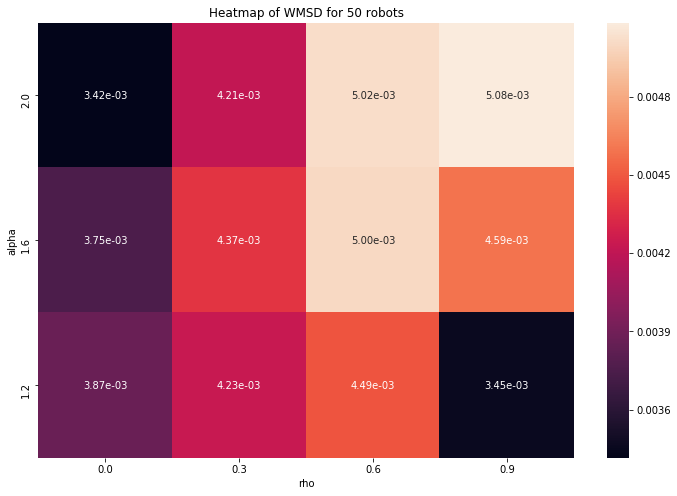

In [9]:
for key, value in total_dict.items():
    fig=plt.figure(figsize = (12, 8))
    dataFrame=pd.DataFrame.from_dict(value)
    reversed_df=dataFrame.iloc[::-1]
    ax=sns.heatmap(reversed_df, annot = True, fmt = ".2e")
    ax.set_title("Heatmap of WMSD for %s robots" % (key))
    ax.set_ylabel("alpha")
    ax.set_xlabel("rho")
    plt.show()
    #Salva su file
#     file_name="%s/WMSD_%s_robots_heatmap.png" % (folder, key)
#     plt.savefig(file_name)
#     reversed_df.to_pickle(file_name[:-4] + ".pickle")